In [ ]:
import numpy as np

In [ ]:
#First of all we are going to create Nodes
class Node:
    def __init__(self):
        # We are going to assign an information vector (data) for each node
        # 20 random values for data
        # Data can represent anything
        self.data = np.random.randn(20)
        # 20 random values for key query and value
        self.key_inf = np.random.randn(20)
        self.query_inf = np.random.randn(20)
        self.value_inf = np.random.randn(20)

    def key(self):
        #this method calculates the key value for the node
        #the size of 20
        #by using @ operator we get the key value
        return self.key_inf @ self.data

    def query(self):

        return self.query_inf @ self.data

    def value(self):
        return self.value_inf @ self.data

In [ ]:
#Initialize Nodes
nodes = [Node() for _ in range(5)]  # Creating 5 nodes
nodes

In [ ]:
#Compute Attention Scores using Node 0's query
query_vector = nodes[0].query()
#Collecting all key values
key_vectors = np.array([node.key() for node in nodes])

In [ ]:
query_vector

-0.3514844900432397

In [ ]:
key_vectors


array([ 3.73644836, -5.02393132,  1.17852425, -1.876658  ,  0.63991954])

In [ ]:
#Compute dot product between query and keys
attention_scores = np.dot(key_vectors, query_vector)
print("Raw Attention Scores:", attention_scores)

Raw Attention Scores: [-1.31330365  1.76583394 -0.41423299  0.65961618 -0.22492179]


In [ ]:
#Apply Softmax
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
softmax_scores = softmax(attention_scores)
print("Normalized Attention Scores (Softmax):", softmax_scores)

Normalized Attention Scores (Softmax): [0.02828208 0.61484248 0.06949808 0.20339469 0.08398266]


In [ ]:
#Compute Weighted Values

#Collecting all values
value_vectors = np.array([node.value() for node in nodes])
#@ product to calculate the weighted sum
weighted_values = softmax_scores @ value_vectors
print("Final Attention Output:", weighted_values)

Final Attention Output: 4.9325472607050855


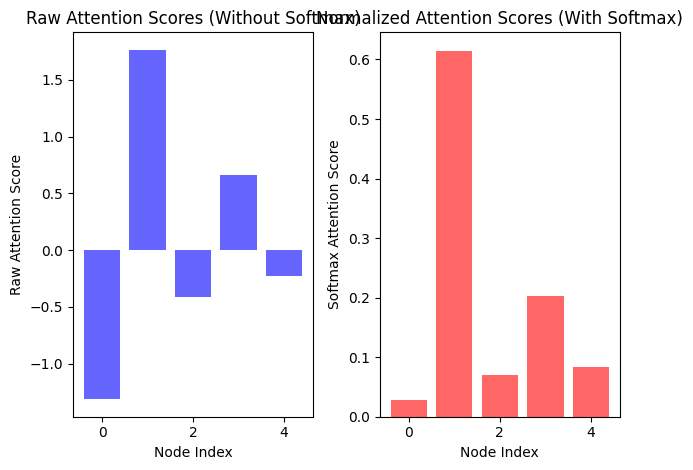

In [ ]:
#Importance of Softmax

# Raw scores
plt.subplot(1, 2, 1)
plt.bar(range(len(attention_scores)), attention_scores, color='blue', alpha=0.6)
plt.xlabel("Node Index")
plt.ylabel("Raw Attention Score")
plt.title("Raw Attention Scores (Without Softmax)")

# Softmax scores
plt.subplot(1, 2, 2)
plt.bar(range(len(softmax_scores)), softmax_scores, color='red', alpha=0.6)
plt.xlabel("Node Index")
plt.ylabel("Softmax Attention Score")
plt.title("Normalized Attention Scores (With Softmax)")

plt.tight_layout()
plt.show()